/Users/saumikdana/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


https://finance.yahoo.com/calendar/earnings/?day=2024-06-25


/Users/saumikdana/Stock_Selector/scripts/scrape_url.py:24: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
/Users/saumikdana/Stock_Selector/scripts/scrape_url.py:24: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
/Users/saumikdana/Stock_Selector/scripts/scrape_url.py:63: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ticker_data = pd.concat(ticker_data_list, ignore_index=True)


Options data for BIDU:
Average IV for Calls: 0.4285433998634783
Average IV for Puts: 0.3727938910957231
Total Call Volume: 13694.0
Total Call open interest: 112195
Total Call engagement: 125889.0
Total Put Volume: 4905.0
Total Put open interest: 100887
Total Put engagement: 105792.0
Number of ITM Call Options: 77
Number of ITM Put Options: 134
Number of OTM Call Options: 146
Number of OTM Put Options: 85


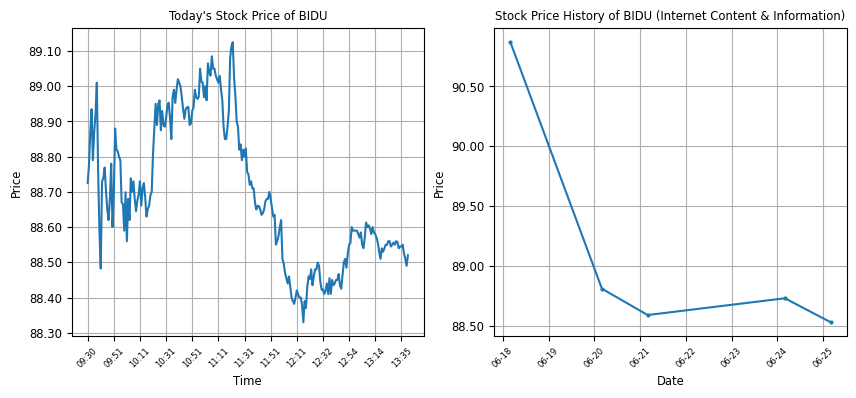

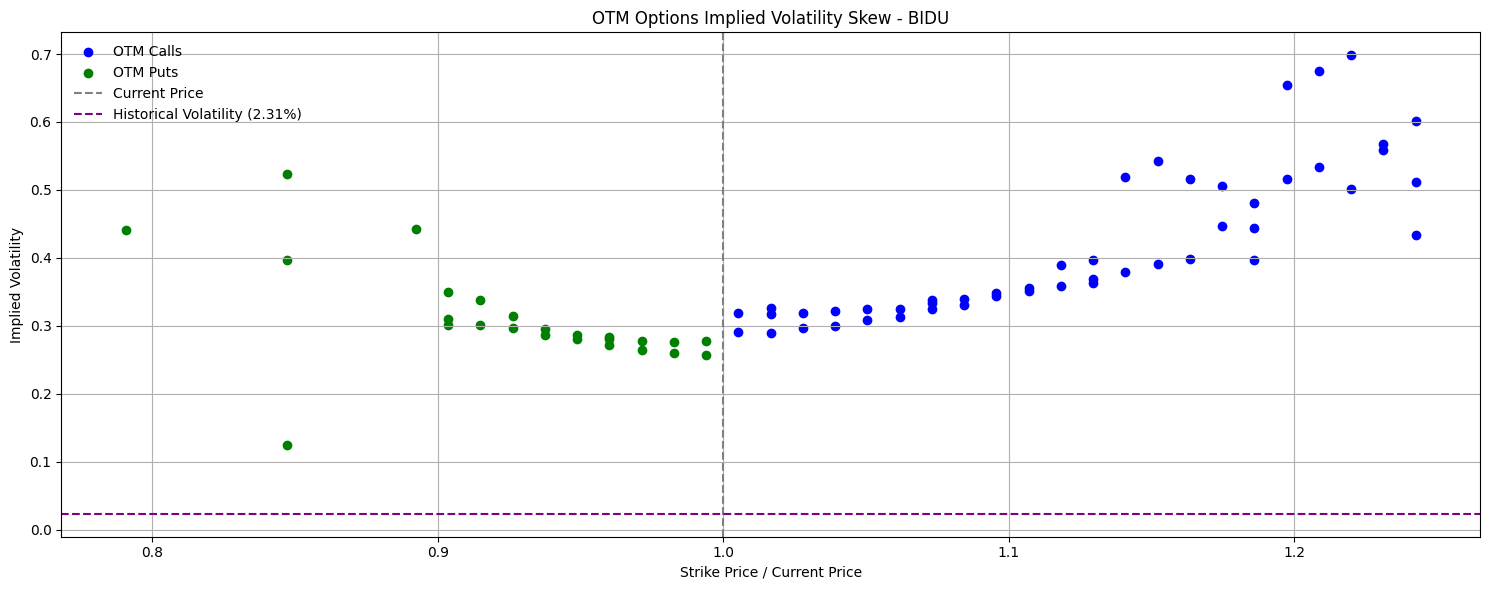

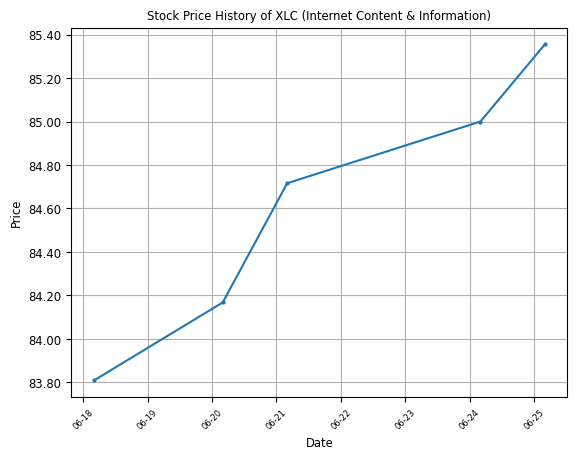

Options data for KMX:
Average IV for Calls: 0.4101631172398158
Average IV for Puts: 0.32378348418712627
Total Call Volume: 6297.0
Total Call open interest: 36248
Total Call engagement: 42545.0
Total Put Volume: 1347.0
Total Put open interest: 30216
Total Put engagement: 31563.0
Number of ITM Call Options: 30
Number of ITM Put Options: 32
Number of OTM Call Options: 33
Number of OTM Put Options: 32


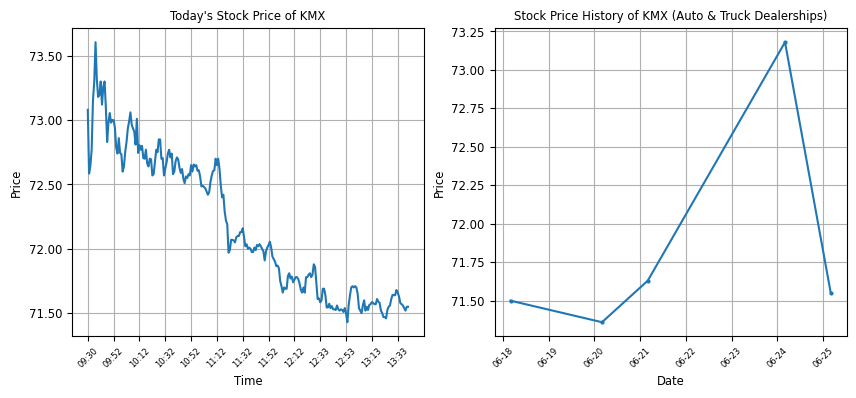

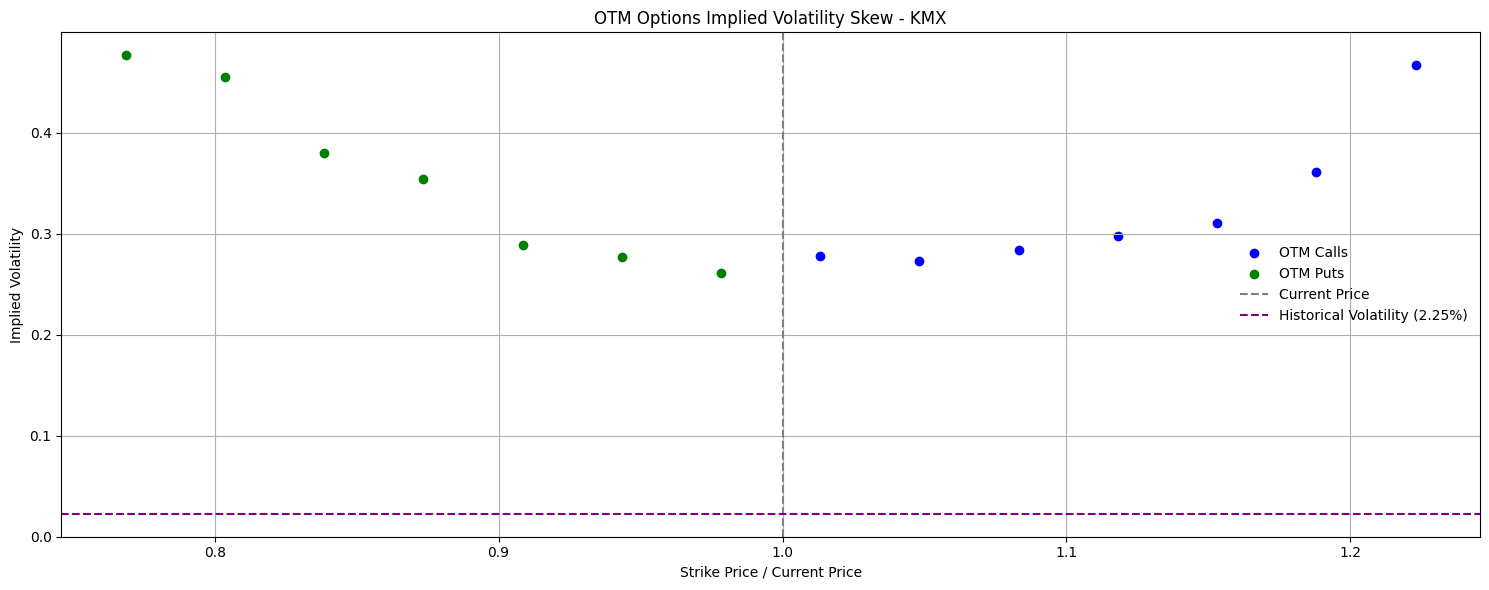

Options data for AXNX:
Average IV for Calls: 0.3549747120361328
Average IV for Puts: 0.3775561376953125
Total Call Volume: 224.0
Total Call open interest: 3084
Total Call engagement: 3308.0
Total Put Volume: 564.0
Total Put open interest: 2590
Total Put engagement: 3154.0
Number of ITM Call Options: 12
Number of ITM Put Options: 4
Number of OTM Call Options: 8
Number of OTM Put Options: 14


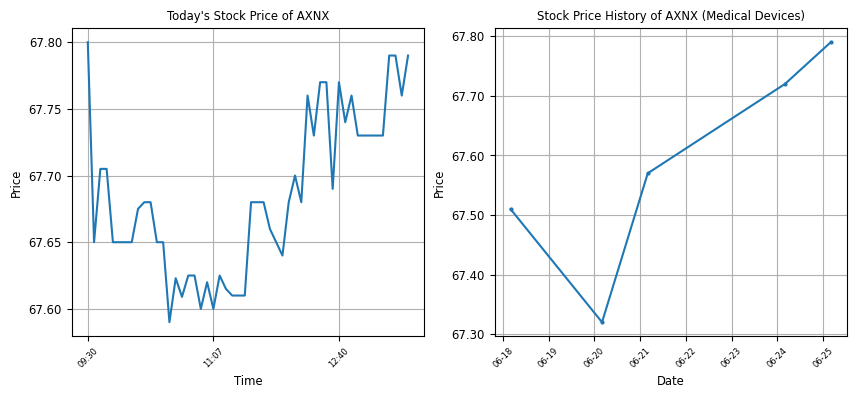

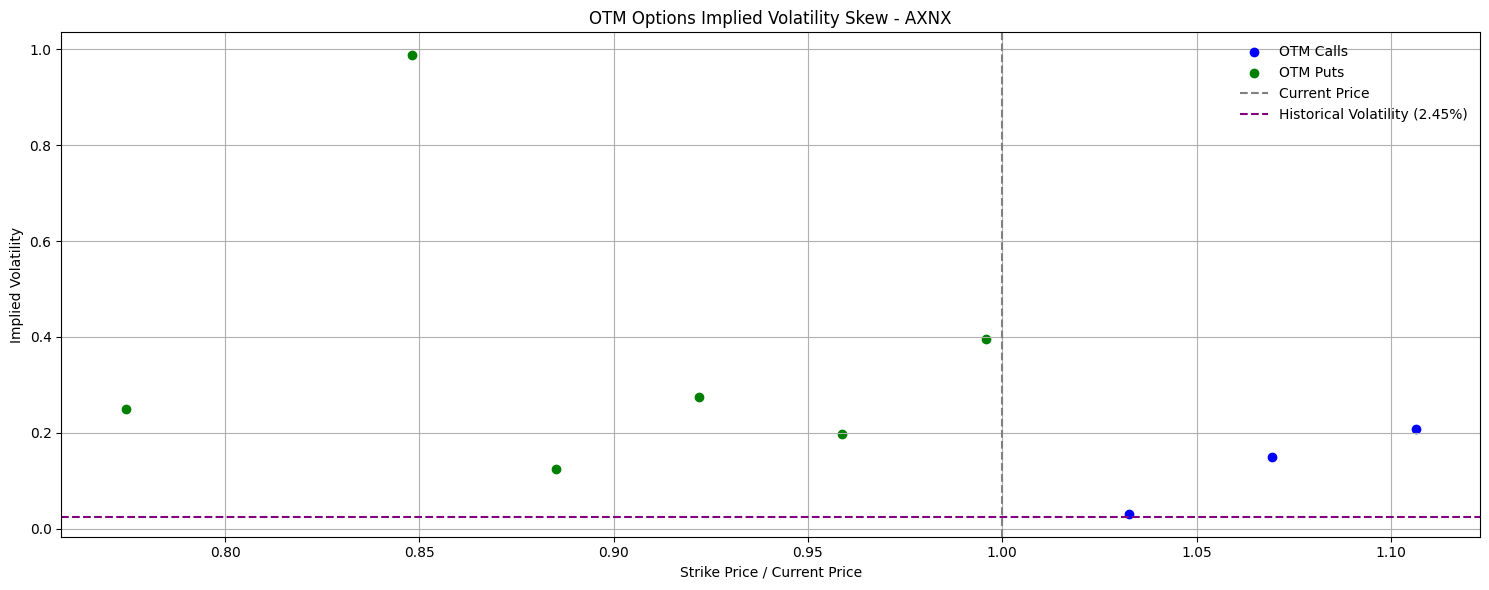

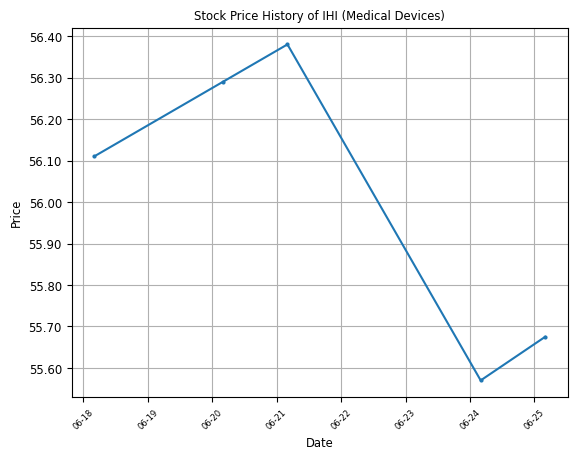

Options data for SCVL:
Average IV for Calls: 0.45239805419921875
Average IV for Puts: 0.5752402502441407
Total Call Volume: 20.0
Total Call open interest: 1358
Total Call engagement: 1378.0
Total Put Volume: 17.0
Total Put open interest: 44
Total Put engagement: 61.0
Number of ITM Call Options: 4
Number of ITM Put Options: 0
Number of OTM Call Options: 5
Number of OTM Put Options: 6


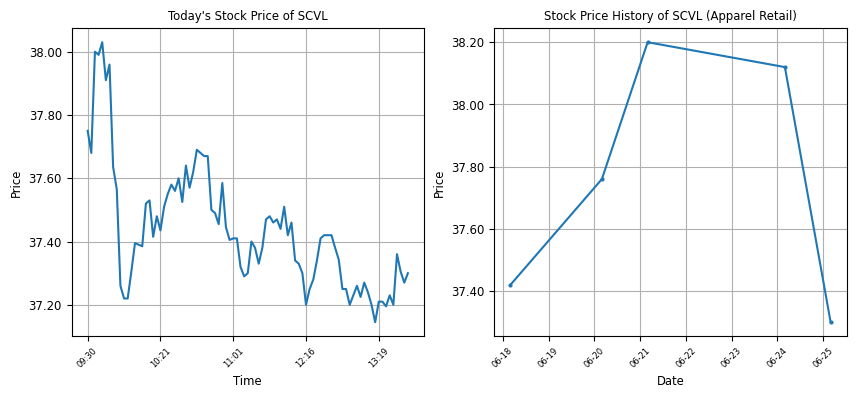

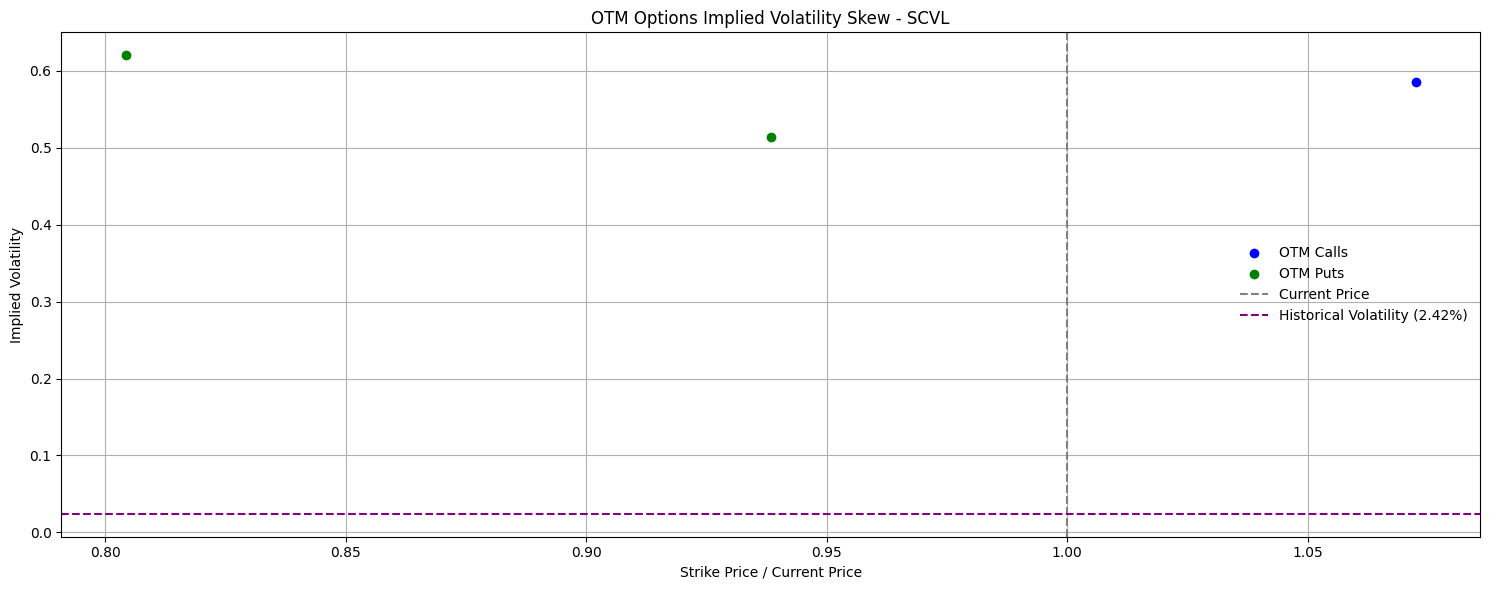

Options data for ATEX:
Average IV for Calls: 0.9252937158203125
Average IV for Puts: 0.6119423571777345
Total Call Volume: 5.0
Total Call open interest: 6.0
Total Call engagement: 11.0
Total Put Volume: 107.0
Total Put open interest: 334
Total Put engagement: 441.0
Number of ITM Call Options: 0
Number of ITM Put Options: 1
Number of OTM Call Options: 1
Number of OTM Put Options: 3


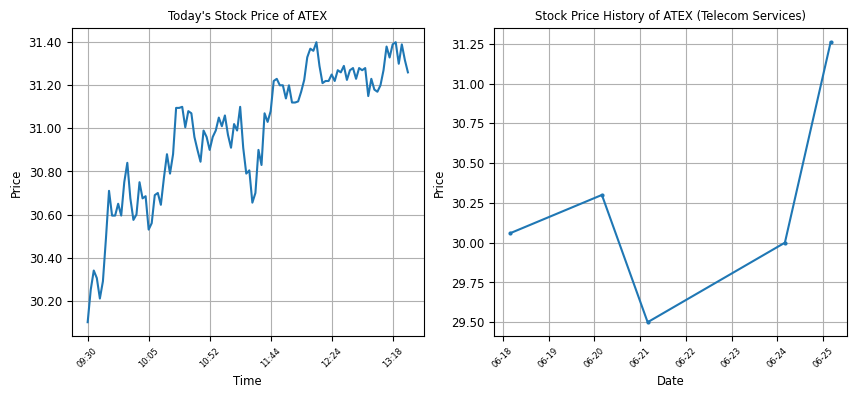

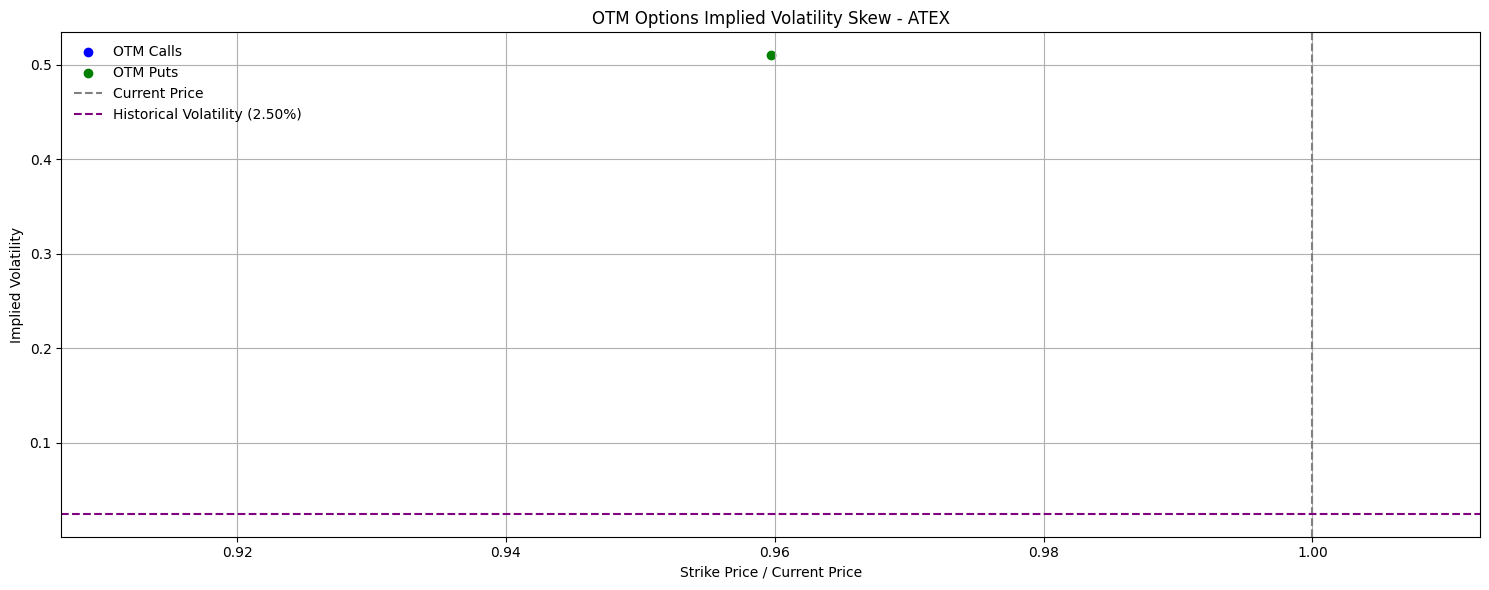

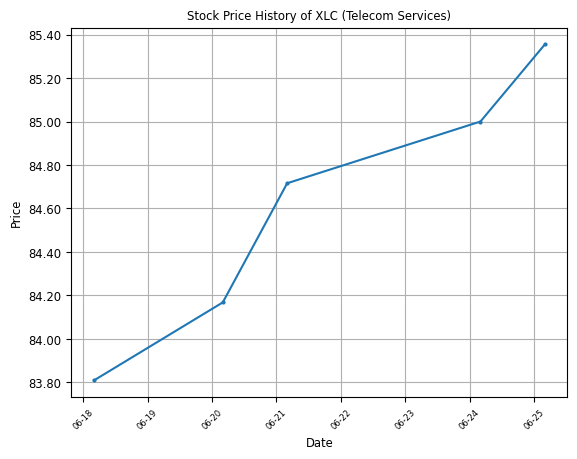

Options data for AVNW:
Average IV for Calls: 0.6109047698974609
Average IV for Puts: 0.4778698046875
Total Call Volume: 512.0
Total Call open interest: 1165
Total Call engagement: 1677.0
Total Put Volume: 26.0
Total Put open interest: 650.0
Total Put engagement: 676.0
Number of ITM Call Options: 2
Number of ITM Put Options: 4
Number of OTM Call Options: 6
Number of OTM Put Options: 2


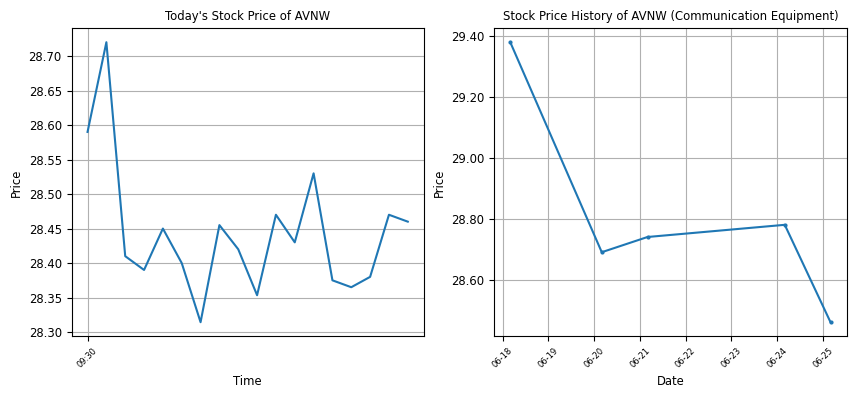

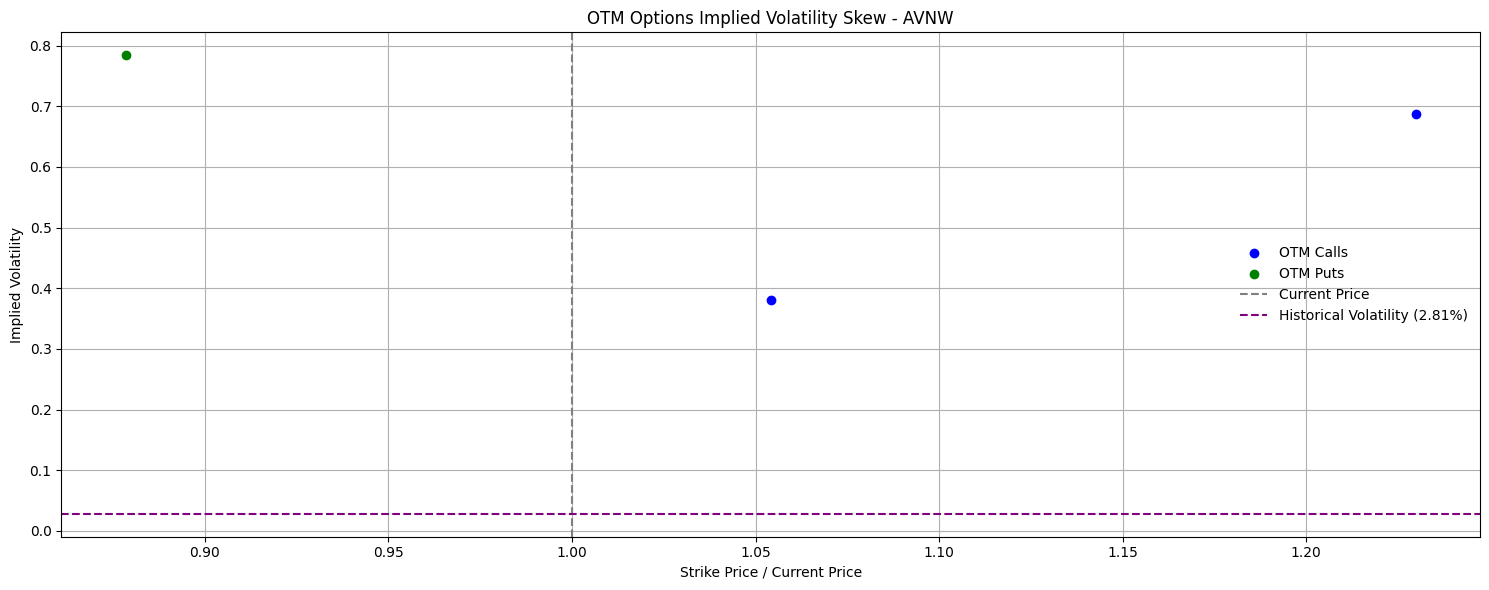

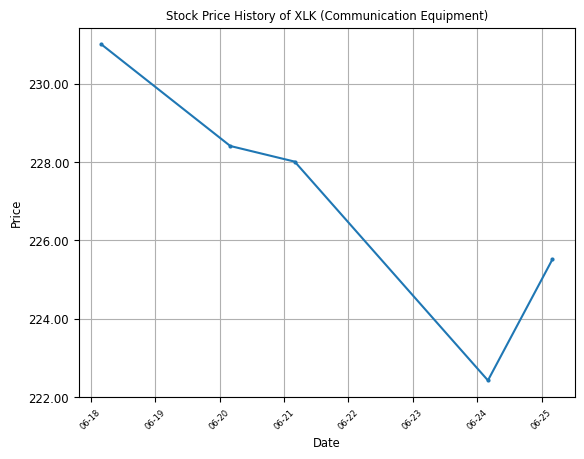

Options data for CECO:
Average IV for Calls: 0.6738155620117187
Average IV for Puts: 0.5629112719726562
Total Call Volume: 99.0
Total Call open interest: 828
Total Call engagement: 927.0
Total Put Volume: 49.0
Total Put open interest: 59.0
Total Put engagement: 108.0
Number of ITM Call Options: 11
Number of ITM Put Options: 0
Number of OTM Call Options: 4
Number of OTM Put Options: 9


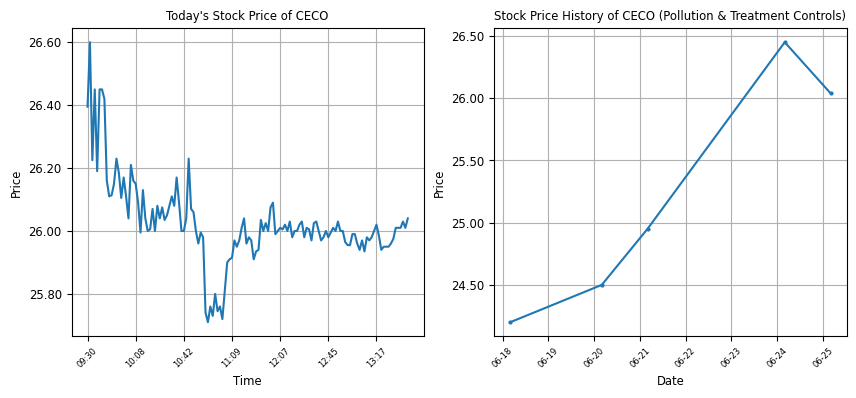

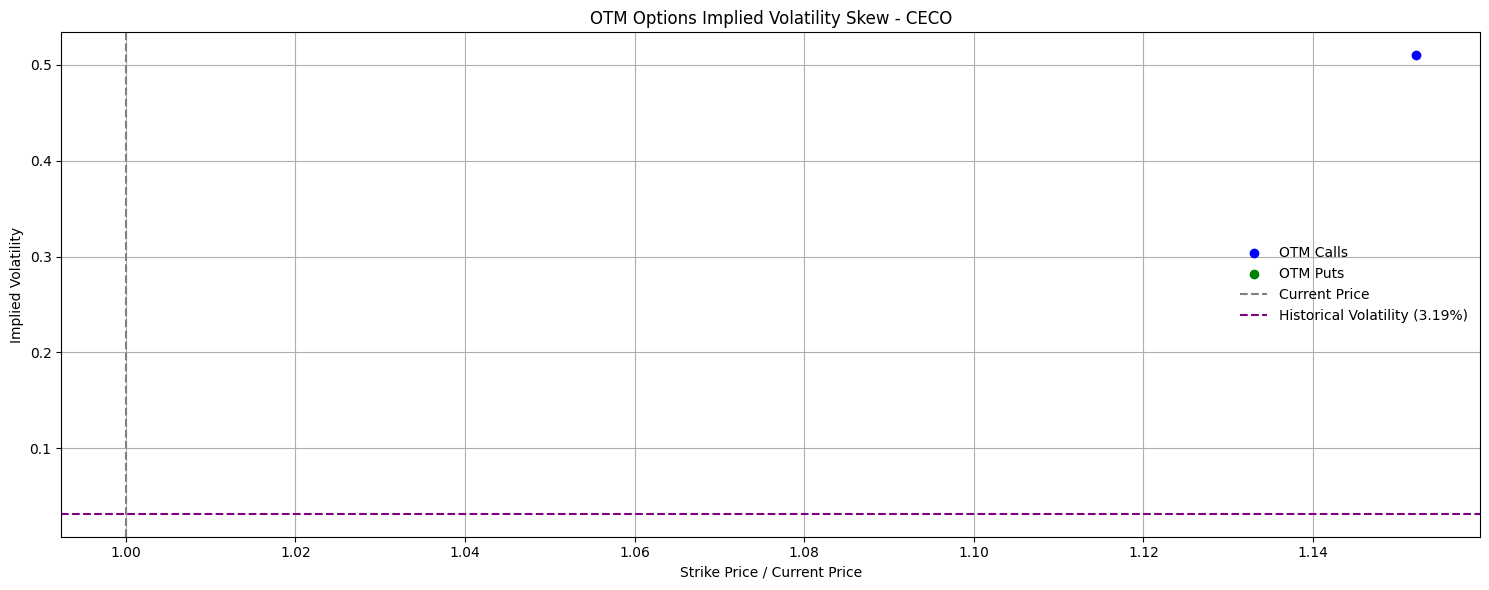

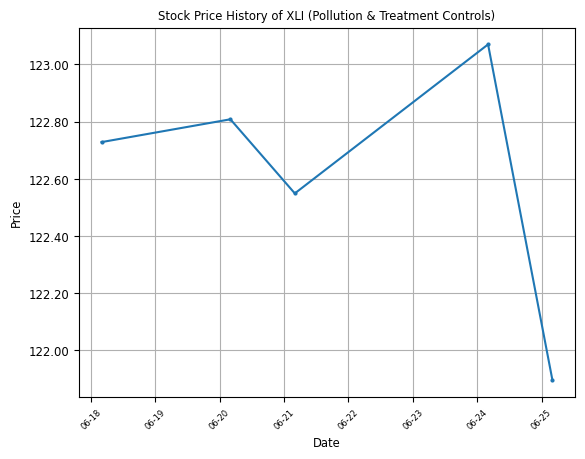

Options data for BVN:
Average IV for Calls: 0.6309477692119893
Average IV for Puts: 0.7577883688693576
Total Call Volume: 156.0
Total Call open interest: 990
Total Call engagement: 1146.0
Total Put Volume: 16.0
Total Put open interest: 243.0
Total Put engagement: 259.0
Number of ITM Call Options: 10
Number of ITM Put Options: 4
Number of OTM Call Options: 15
Number of OTM Put Options: 4


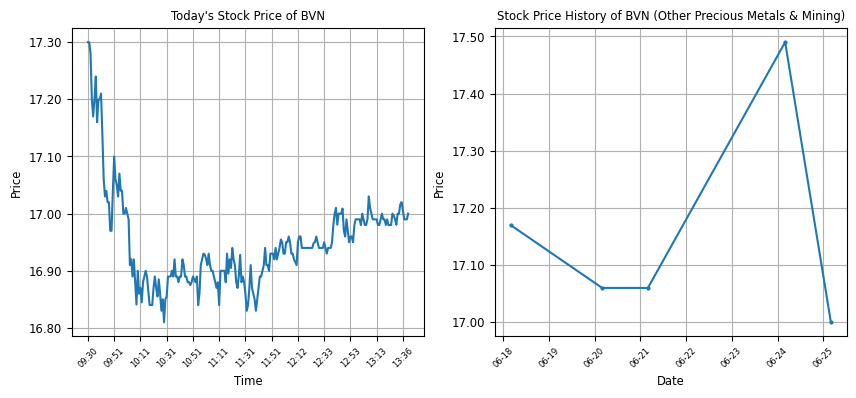

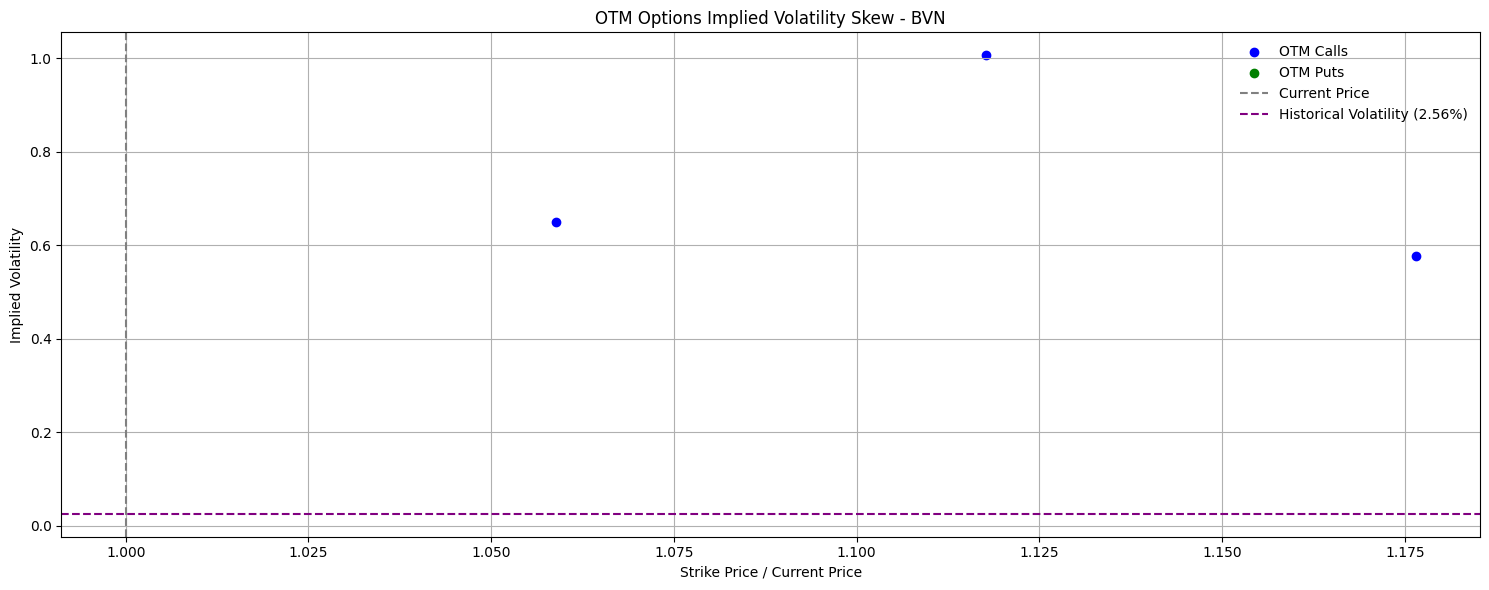

Options data for CPRX:
Average IV for Calls: 0.5186205364990235
Average IV for Puts: 0.5525760888671876
Total Call Volume: 201.0
Total Call open interest: 1288
Total Call engagement: 1489.0
Total Put Volume: 51
Total Put open interest: 595
Total Put engagement: 646
Number of ITM Call Options: 5
Number of ITM Put Options: 3
Number of OTM Call Options: 3
Number of OTM Put Options: 6


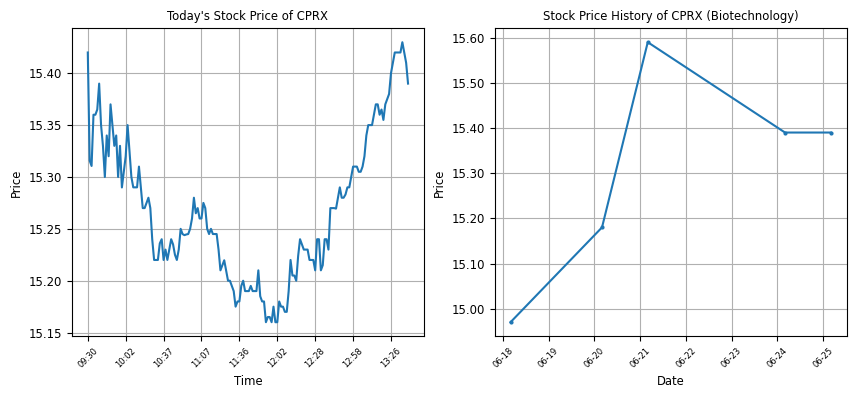

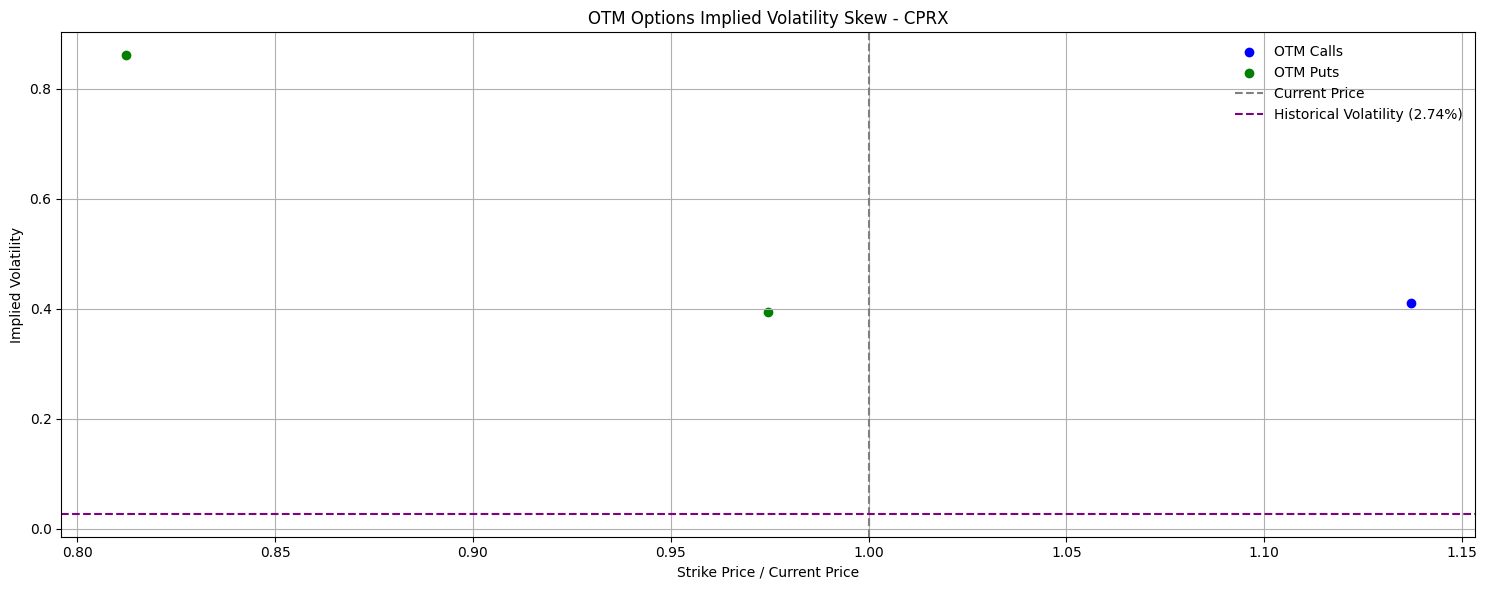

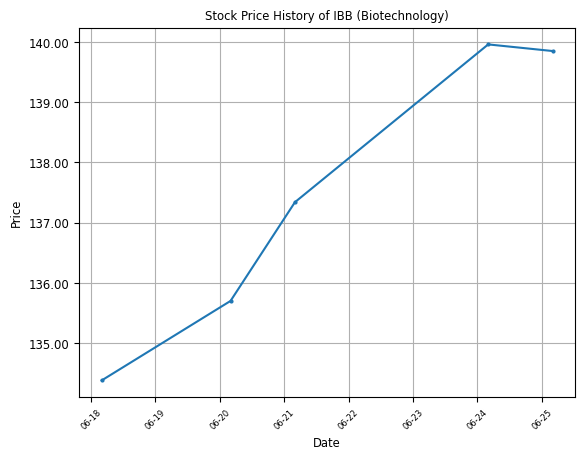

Options data for SIBN:
Average IV for Calls: 0.6904339140625002
Average IV for Puts: 0.8974619628906251
Total Call Volume: 2513.0
Total Call open interest: 2526
Total Call engagement: 5039.0
Total Put Volume: 2500.0
Total Put open interest: 2502.0
Total Put engagement: 5002.0
Number of ITM Call Options: 2
Number of ITM Put Options: 1
Number of OTM Call Options: 3
Number of OTM Put Options: 1


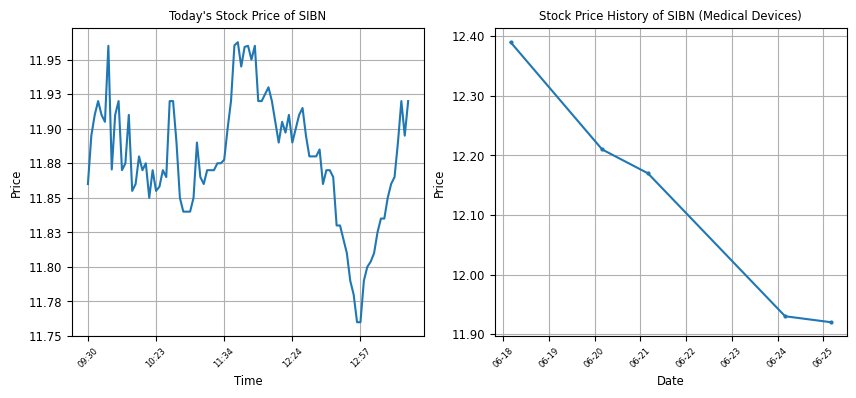

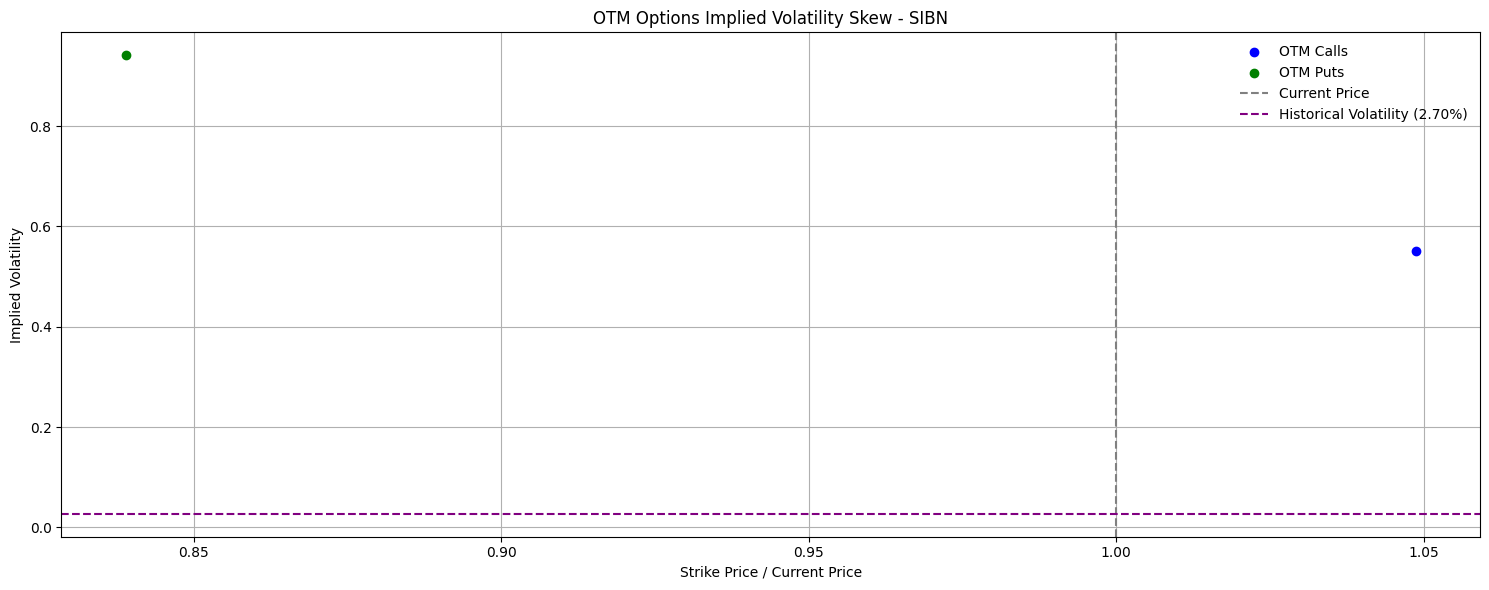

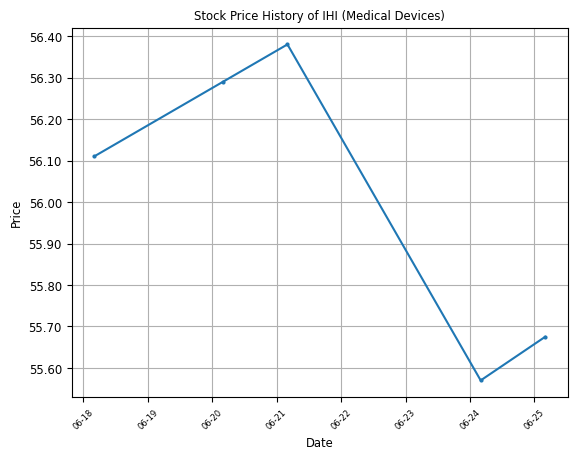

Options data for ASX:
Average IV for Calls: 0.41671900251116073
Average IV for Puts: 0.4879934013671875
Total Call Volume: 635.0
Total Call open interest: 6806
Total Call engagement: 7441.0
Total Put Volume: 24.0
Total Put open interest: 844.0
Total Put engagement: 868.0
Number of ITM Call Options: 3
Number of ITM Put Options: 2
Number of OTM Call Options: 4
Number of OTM Put Options: 3


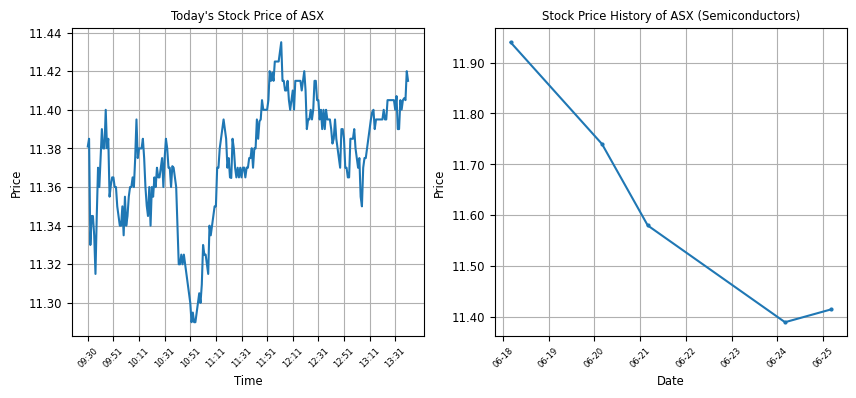

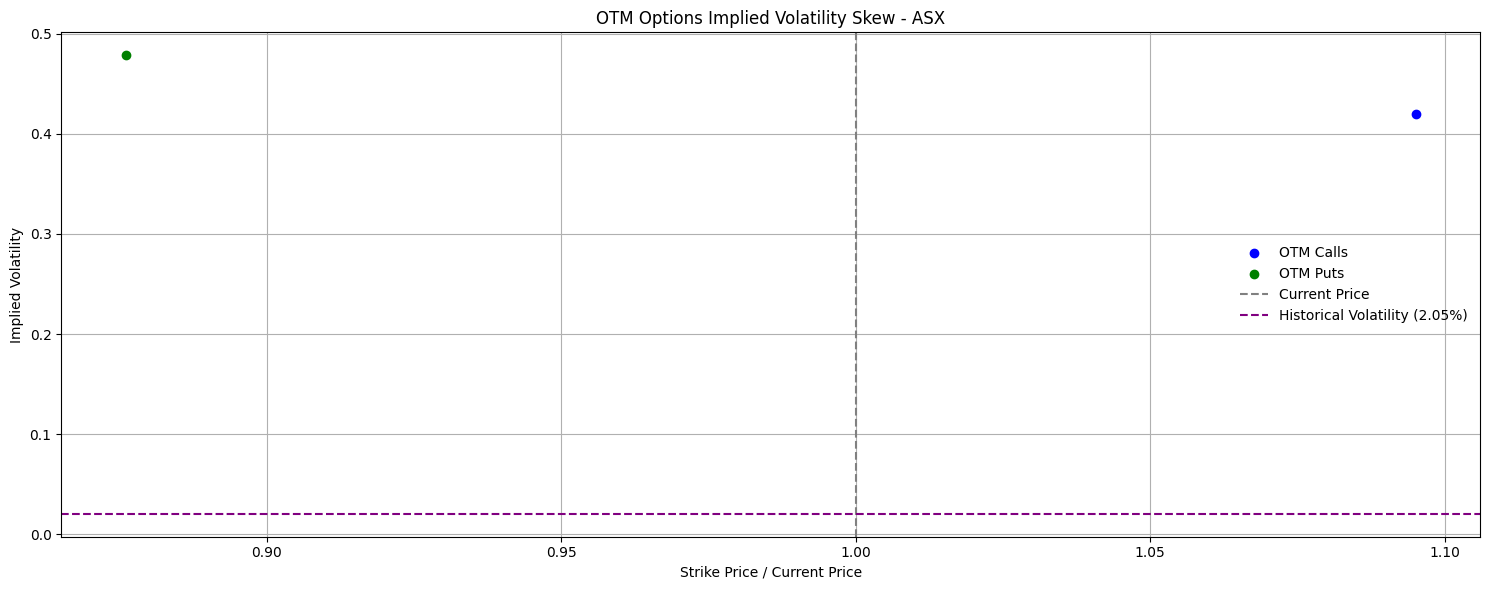

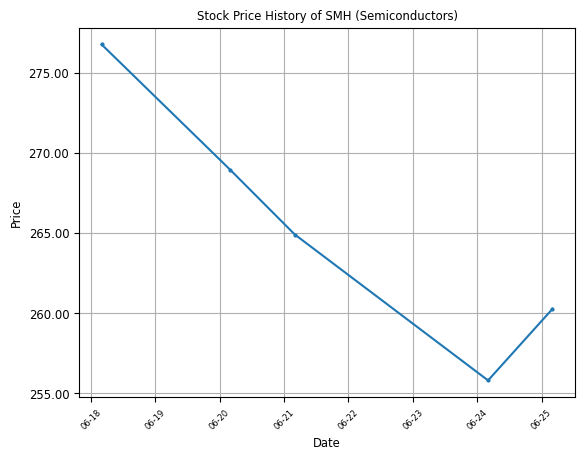

Options data for BBVA:
Average IV for Calls: 0.8398498281249998
Average IV for Puts: 0.36572899902343753
Total Call Volume: 7.0
Total Call open interest: 465
Total Call engagement: 472.0
Total Put Volume: 13.0
Total Put open interest: 1619.0
Total Put engagement: 1632.0
Number of ITM Call Options: 2
Number of ITM Put Options: 2
Number of OTM Call Options: 3
Number of OTM Put Options: 2


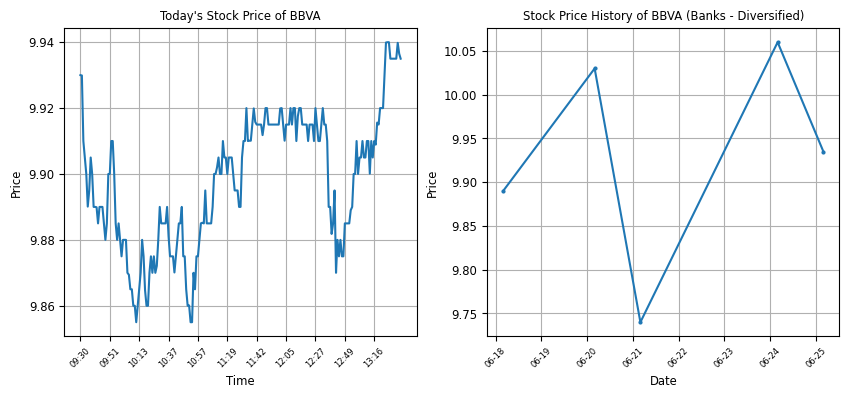

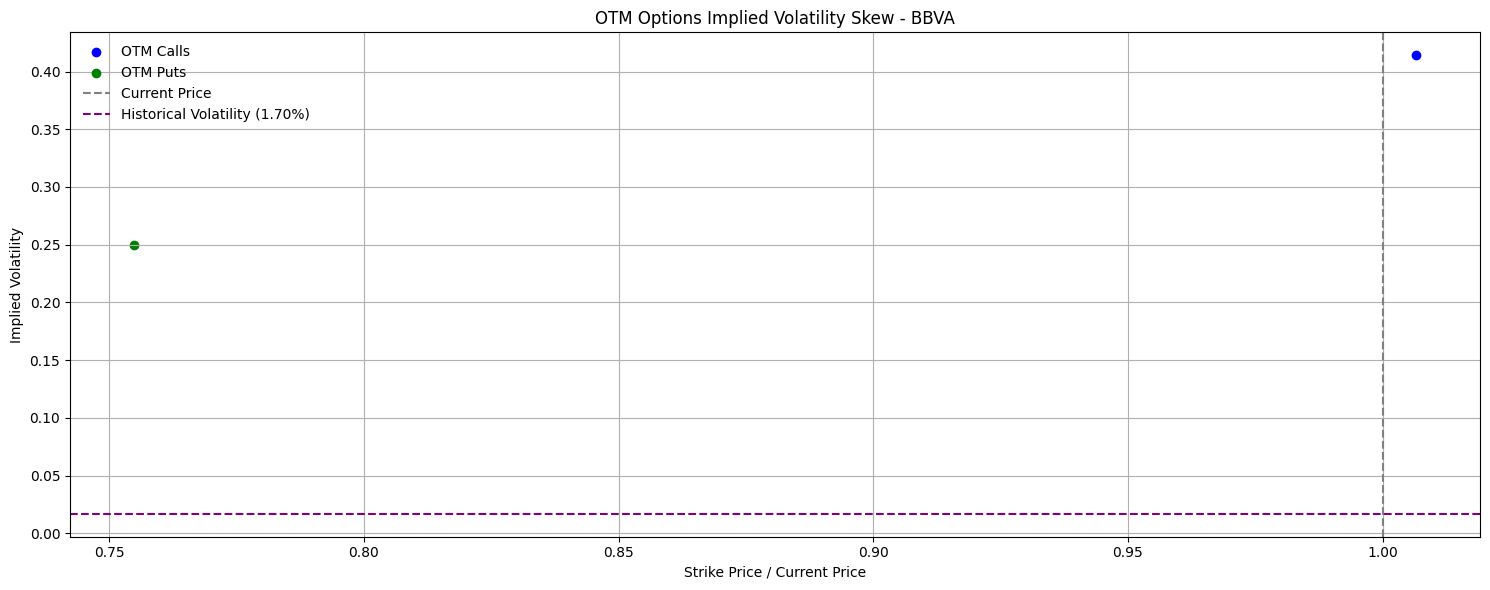

Options data for ASUR:
Average IV for Calls: 0.7024769335937501
Average IV for Puts: 0.5942423388671876
Total Call Volume: 2.0
Total Call open interest: 382
Total Call engagement: 384.0
Total Put Volume: 25.0
Total Put open interest: 166
Total Put engagement: 191.0
Number of ITM Call Options: 3
Number of ITM Put Options: 0
Number of OTM Call Options: 0
Number of OTM Put Options: 2


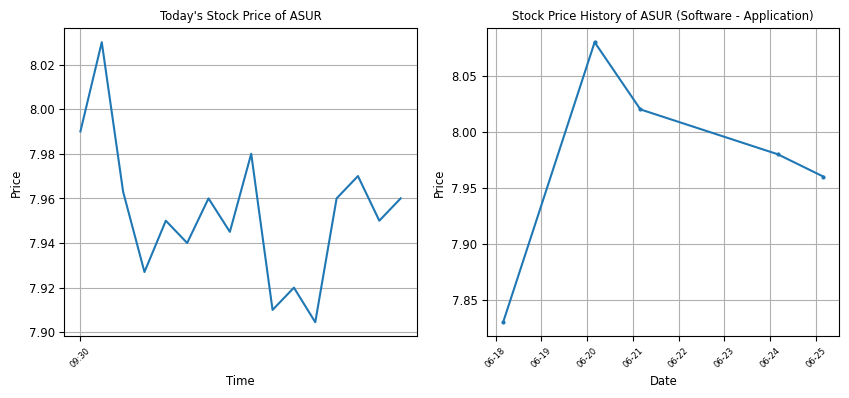

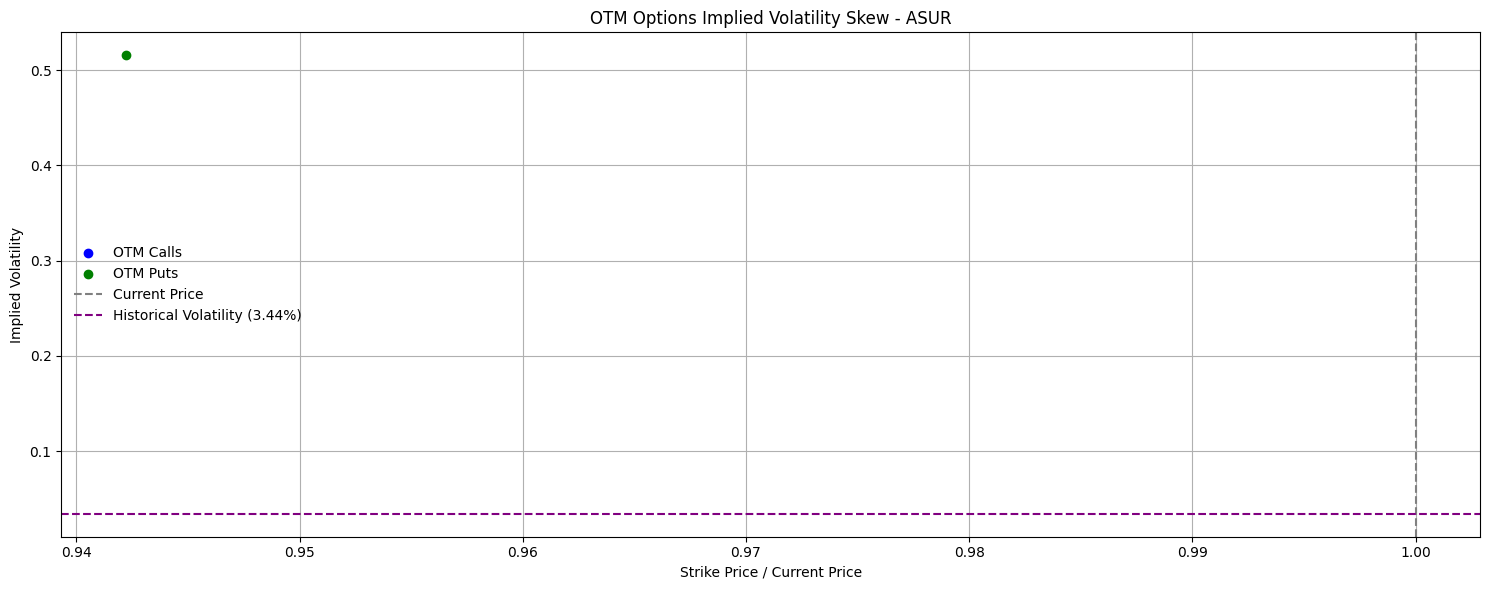

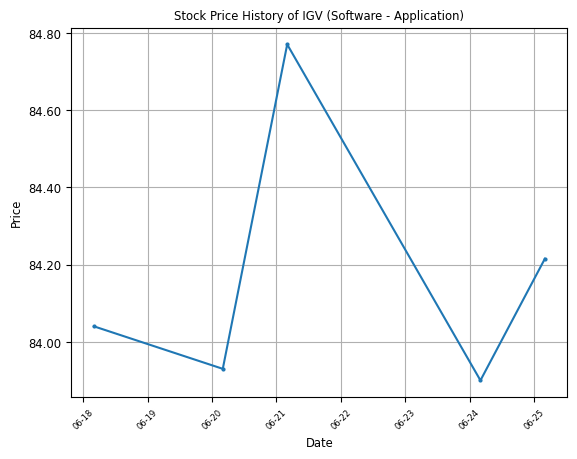

Options data for AIP:
Average IV for Calls: 0.6490920507812501
Average IV for Puts: 0.6471389453125
Total Call Volume: 41.0
Total Call open interest: 95
Total Call engagement: 136.0
Total Put Volume: 6.0
Total Put open interest: 70
Total Put engagement: 76.0
Number of ITM Call Options: 0
Number of ITM Put Options: 3
Number of OTM Call Options: 3
Number of OTM Put Options: 0


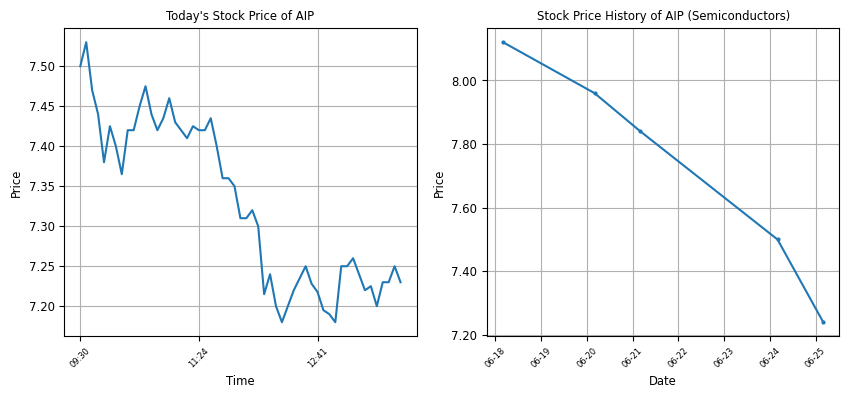

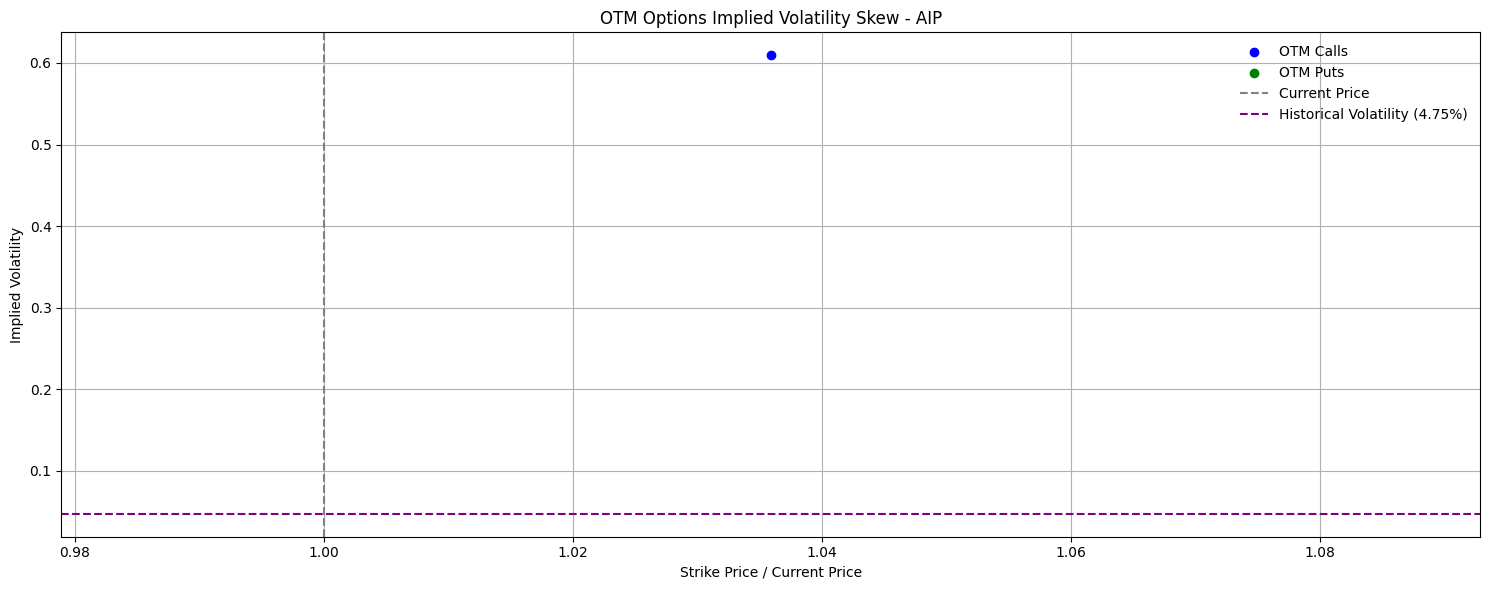

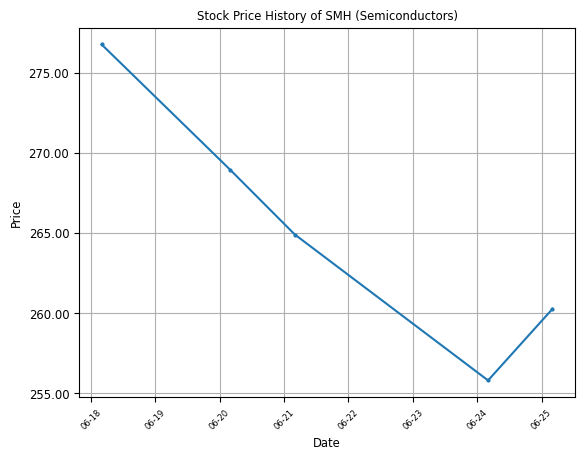

Options data for CDMO:
Average IV for Calls: 0.7541040214843749
Average IV for Puts: 0.7395045581054689
Total Call Volume: 23.0
Total Call open interest: 1749
Total Call engagement: 1772.0
Total Put Volume: 344.0
Total Put open interest: 1052.0
Total Put engagement: 1396.0
Number of ITM Call Options: 0
Number of ITM Put Options: 4
Number of OTM Call Options: 5
Number of OTM Put Options: 0


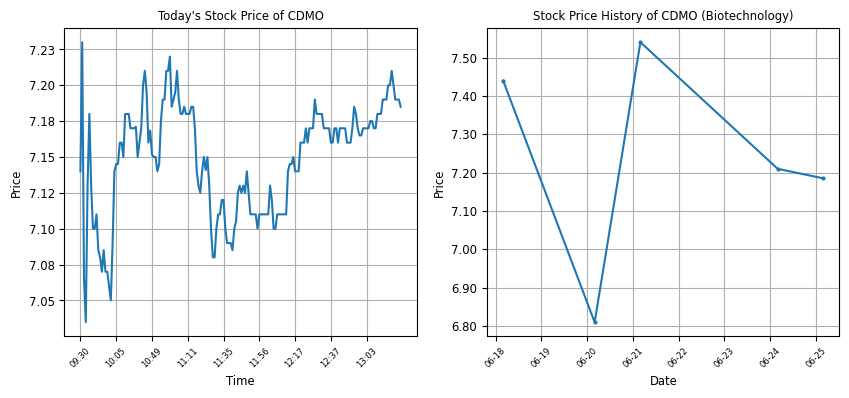

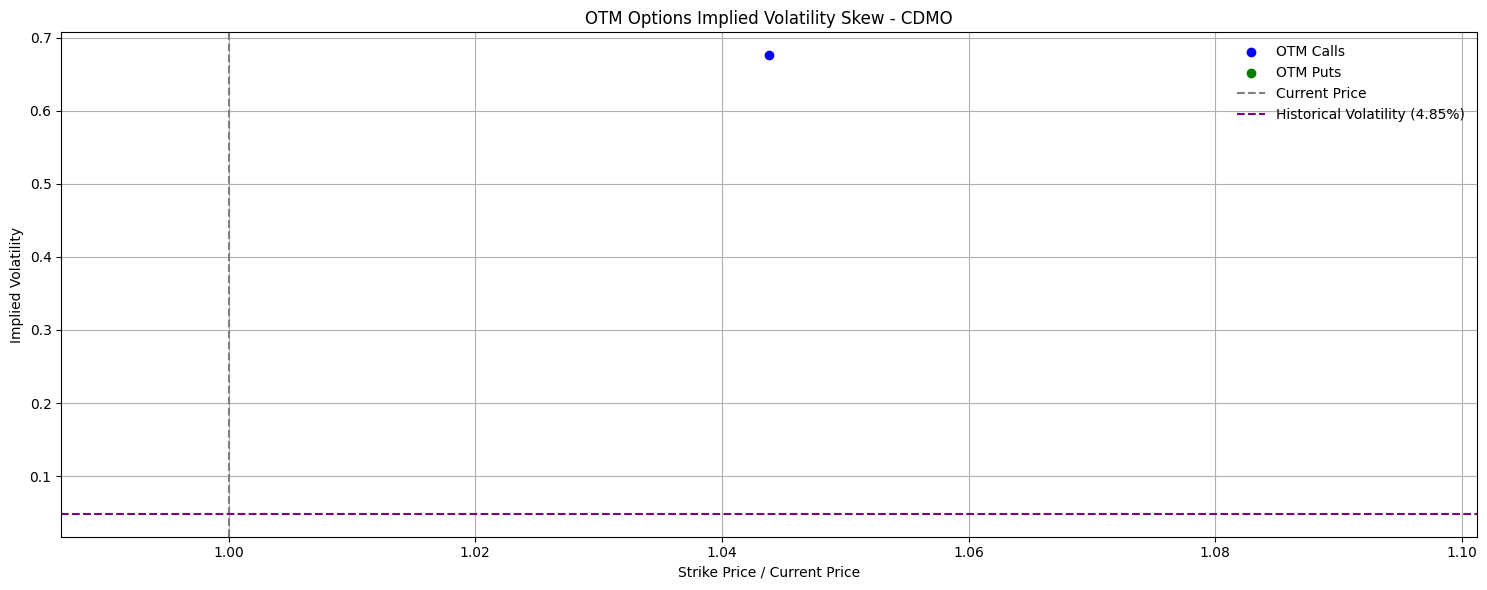

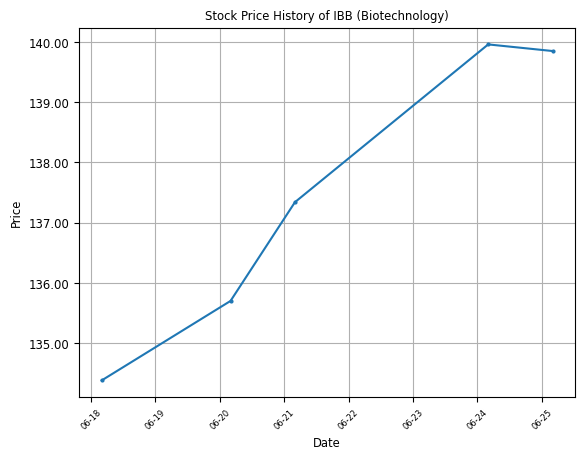

Options data for CELU:
Average IV for Calls: 1.8177103580729164
Average IV for Puts: 1.509768076171875
Total Call Volume: 3.0
Total Call open interest: 30
Total Call engagement: 33.0
Total Put Volume: 99
Total Put open interest: 274
Total Put engagement: 373
Number of ITM Call Options: 3
Number of ITM Put Options: 0
Number of OTM Call Options: 0
Number of OTM Put Options: 3


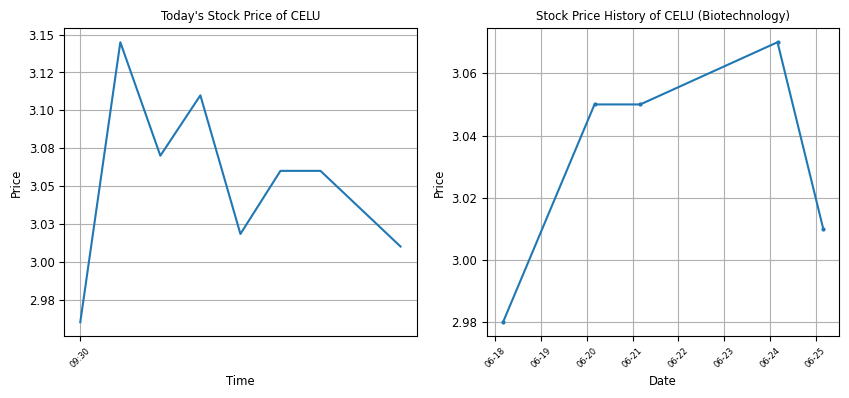

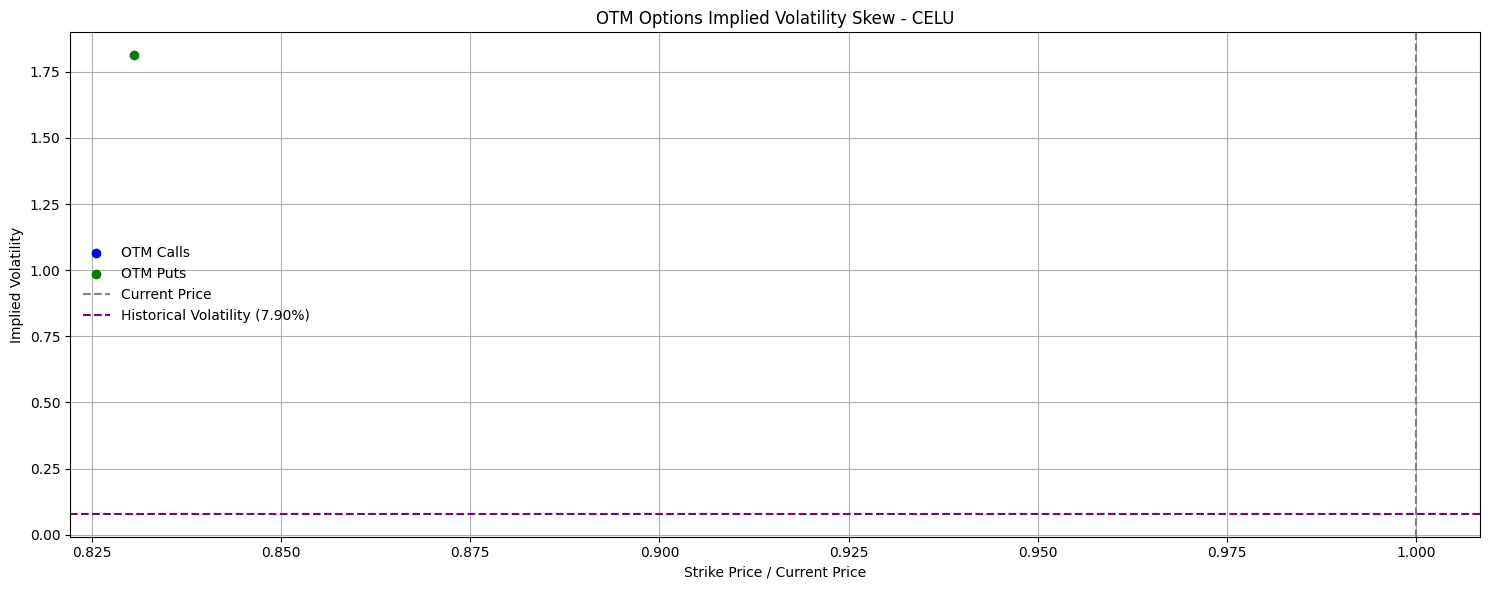

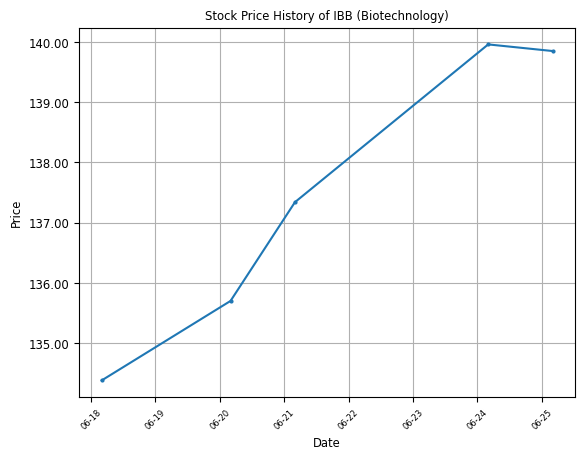

Options data for BTCM:
Average IV for Calls: 1.1224002213541668
Average IV for Puts: 0.9036489322916665
Total Call Volume: 61.0
Total Call open interest: 185.0
Total Call engagement: 246.0
Total Put Volume: 5.0
Total Put open interest: 32
Total Put engagement: 37.0
Number of ITM Call Options: 0
Number of ITM Put Options: 3
Number of OTM Call Options: 3
Number of OTM Put Options: 0


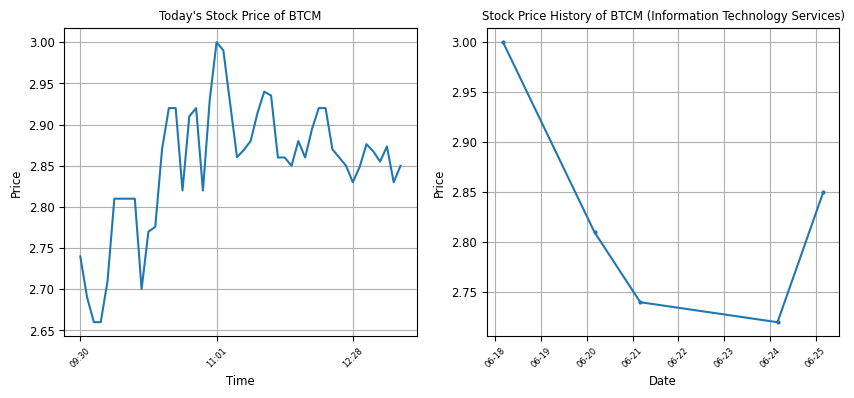

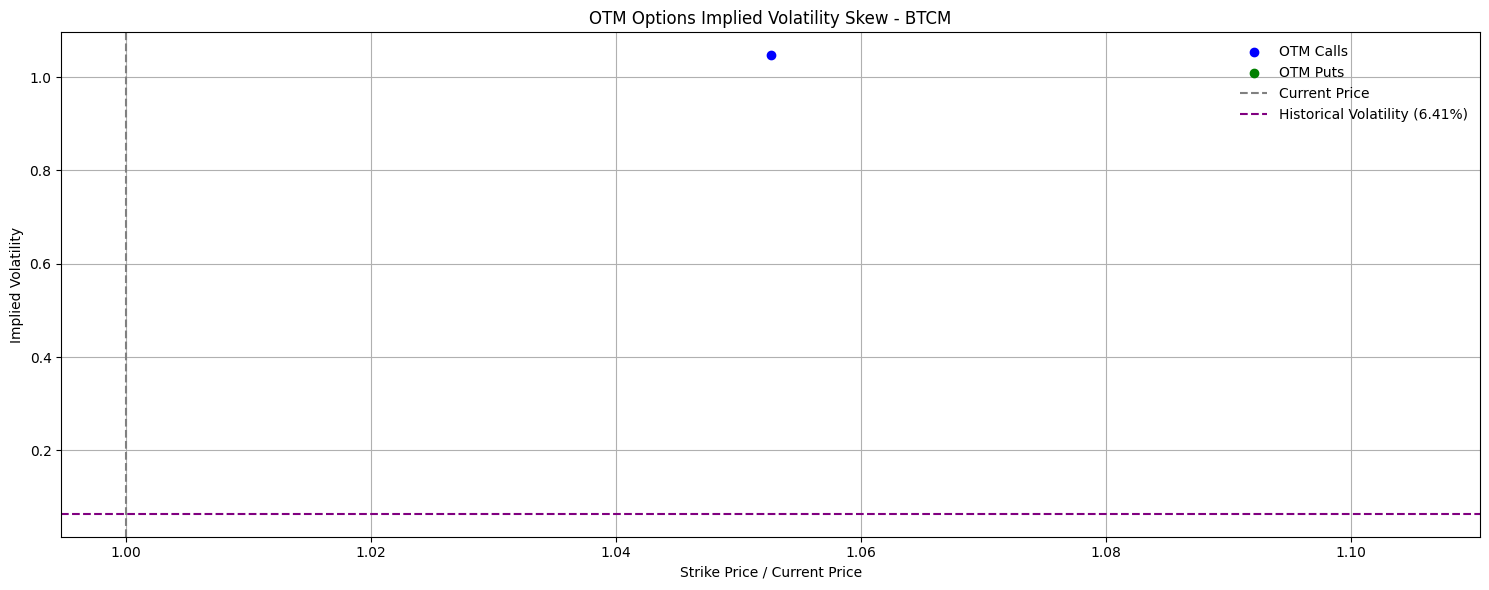

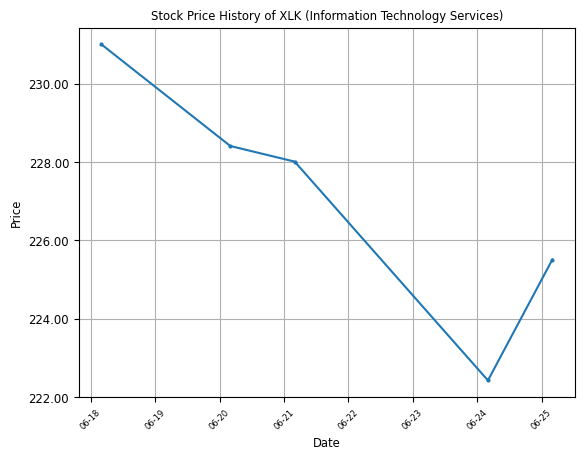

Options data for ADN:
Average IV for Calls: 1.0000000000000003e-05
Average IV for Puts: 2.4843787890625
Total Call Volume: 61
Total Call open interest: 1317
Total Call engagement: 1378
Total Put Volume: 20.0
Total Put open interest: 22.0
Total Put engagement: 42.0
Number of ITM Call Options: 1
Number of ITM Put Options: 0
Number of OTM Call Options: 0
Number of OTM Put Options: 1


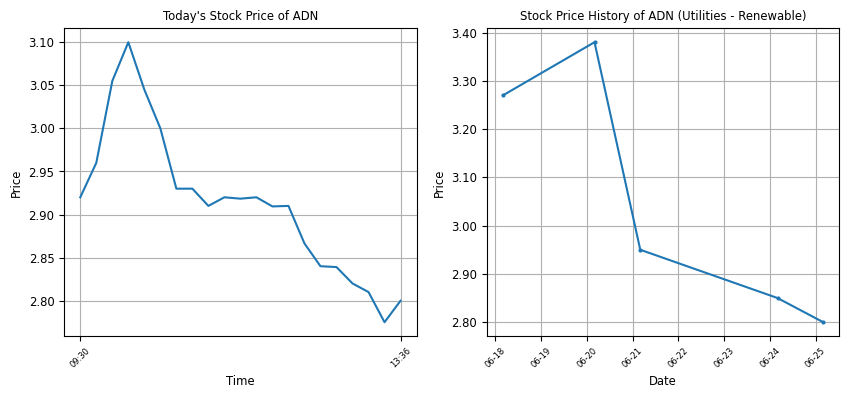

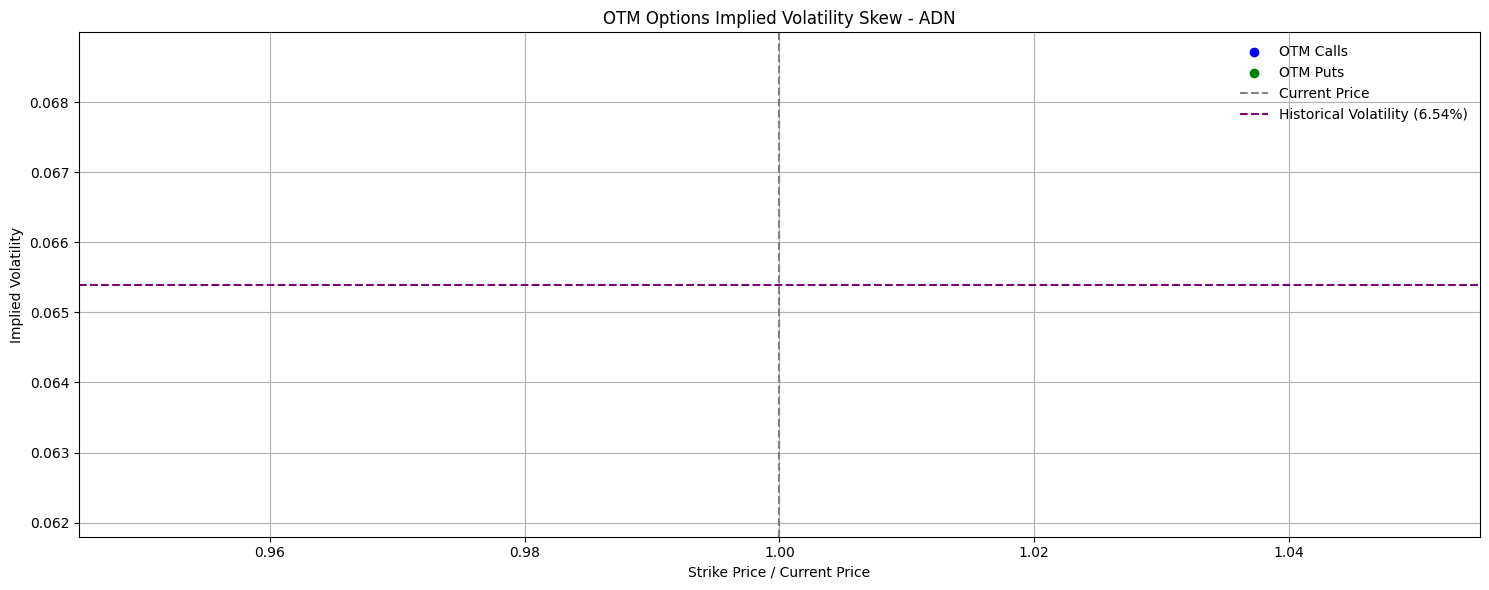

Options data for BYSI:
Average IV for Calls: 1.6562517187499999
Average IV for Puts: 0.5312573437500001
Total Call Volume: 32
Total Call open interest: 1148
Total Call engagement: 1180
Total Put Volume: 5.0
Total Put open interest: 48.0
Total Put engagement: 53.0
Number of ITM Call Options: 0
Number of ITM Put Options: 2
Number of OTM Call Options: 2
Number of OTM Put Options: 0


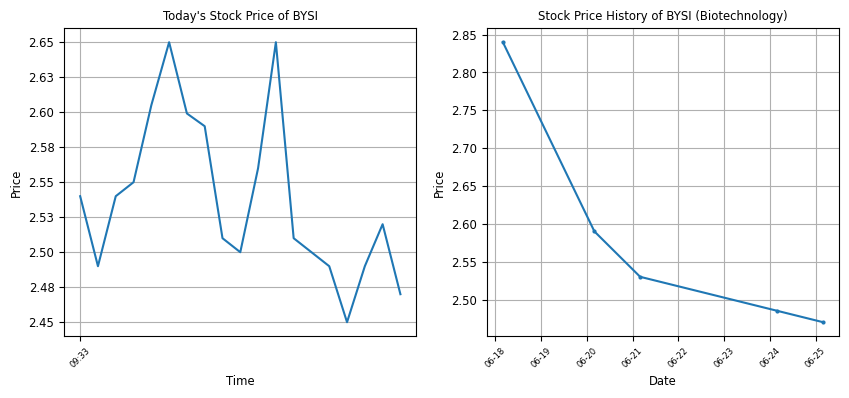

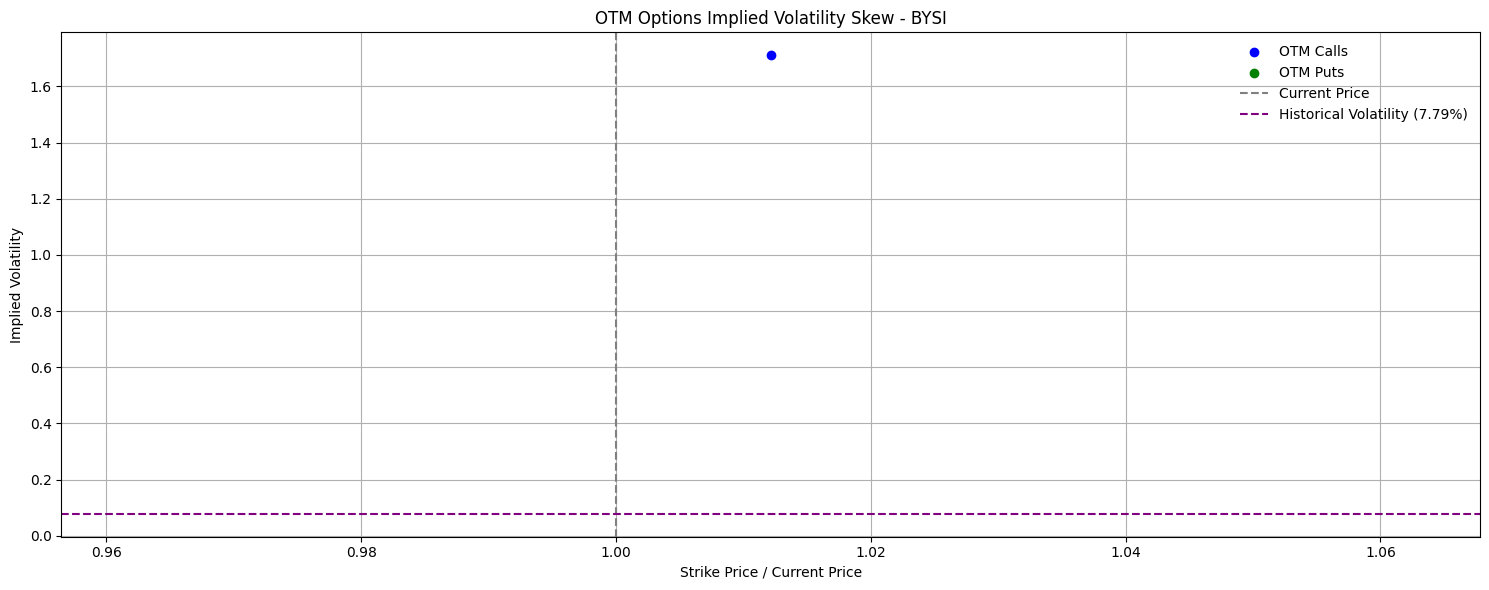

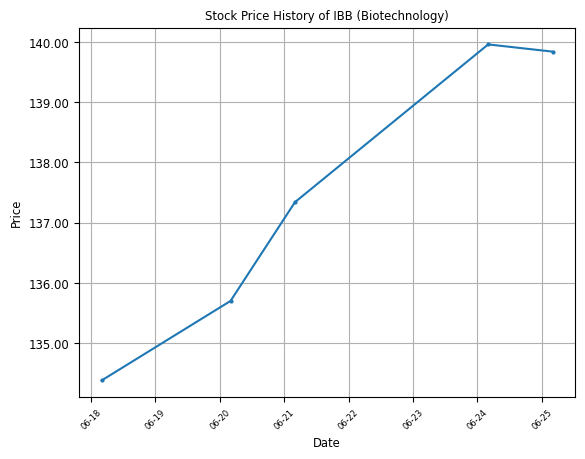

Options data for BB:
Average IV for Calls: 0.9652007528409089
Average IV for Puts: 0.8282164231178978
Total Call Volume: 6738.0
Total Call open interest: 43602
Total Call engagement: 50340.0
Total Put Volume: 1167.0
Total Put open interest: 23597
Total Put engagement: 24764.0
Number of ITM Call Options: 11
Number of ITM Put Options: 11
Number of OTM Call Options: 11
Number of OTM Put Options: 11


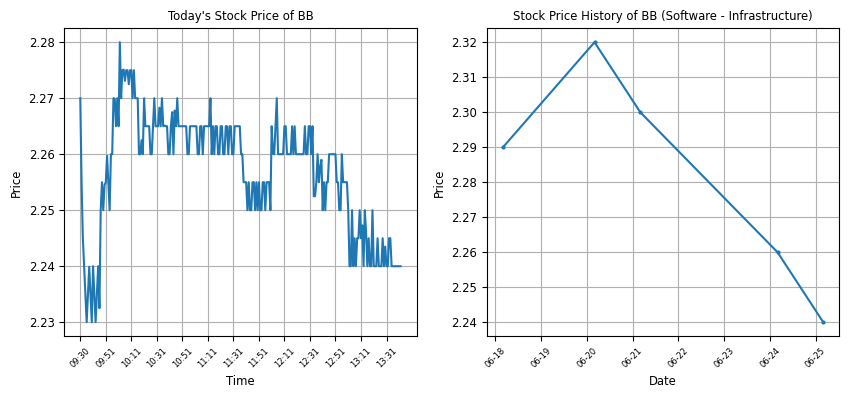

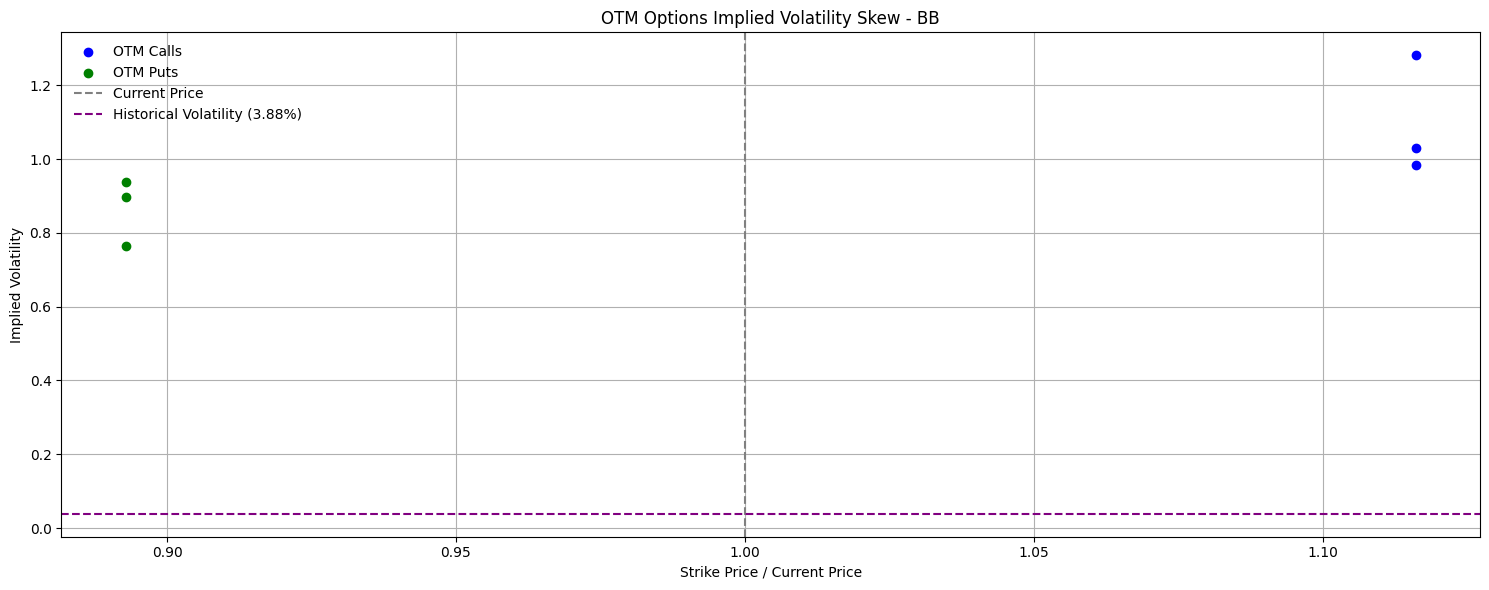

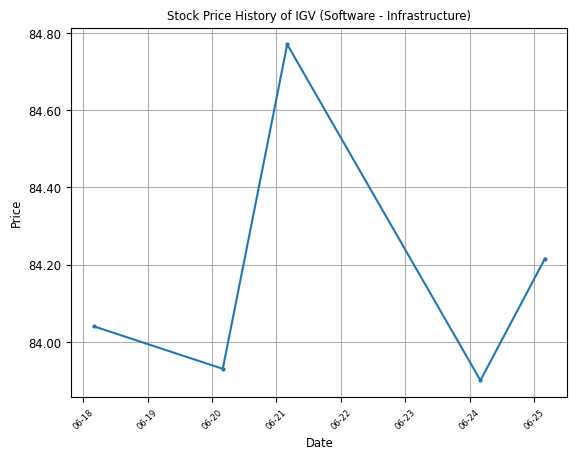

Options data for LAB:
Average IV for Calls: 0.6781282187500001
Average IV for Puts: 0.45117736328125
Total Call Volume: 107.0
Total Call open interest: 115
Total Call engagement: 222.0
Total Put Volume: 40.0
Total Put open interest: 140.0
Total Put engagement: 180.0
Number of ITM Call Options: 1
Number of ITM Put Options: 1
Number of OTM Call Options: 4
Number of OTM Put Options: 1


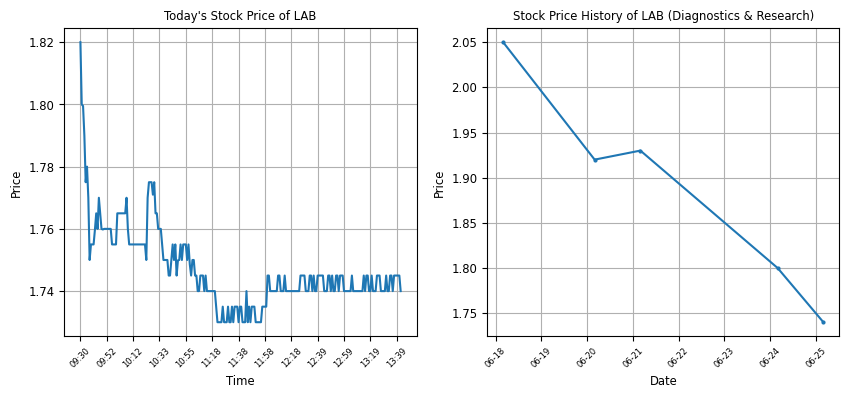

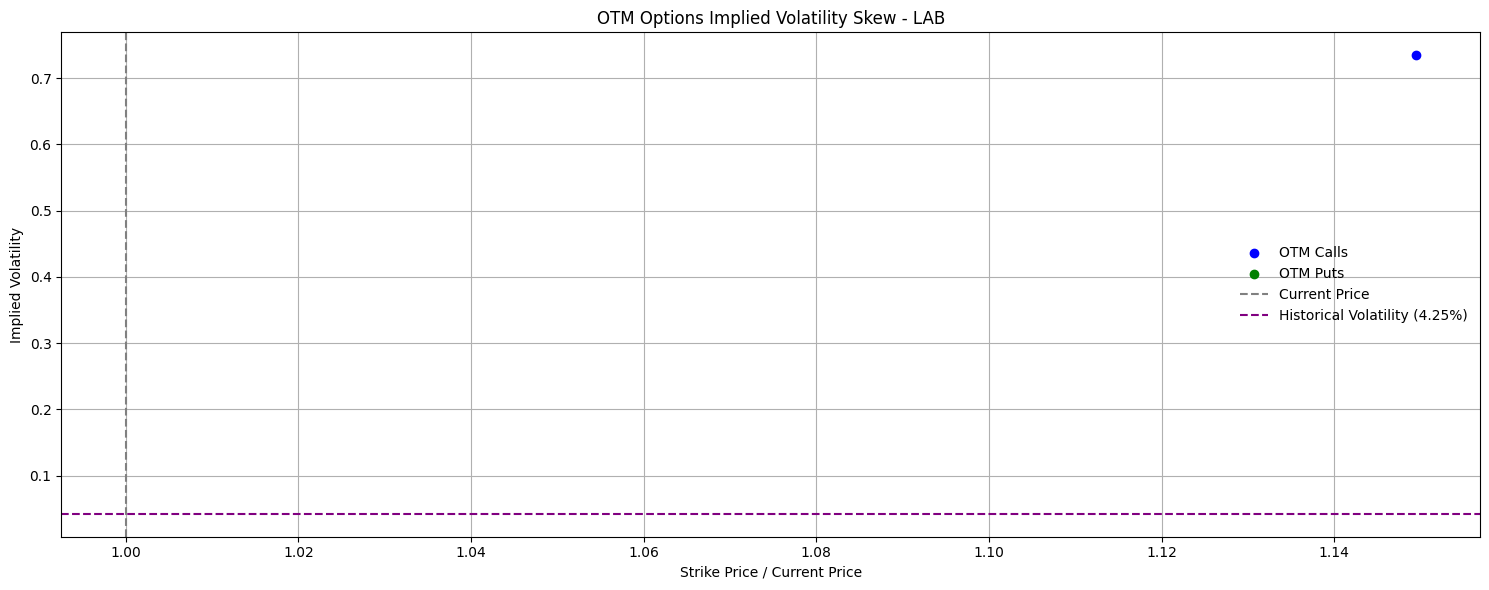

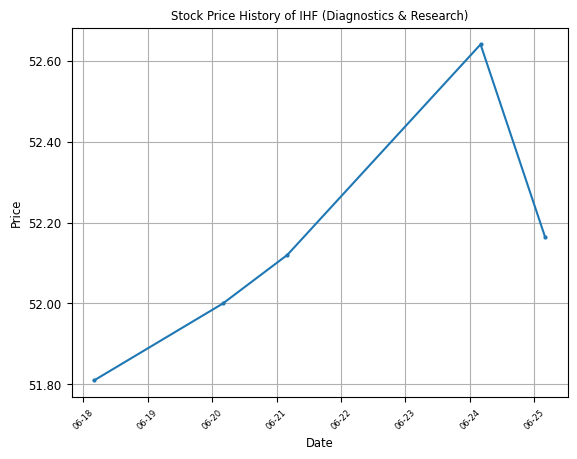

In [1]:
import setup
from imports import *
from scripts.analyze_stock import *  
from scripts.scrape_url import *
from scripts.plotting_routines import *

# Call the function and store the result
day = '2024-06-25'
date = datetime.strptime(day, '%Y-%m-%d')

# Set the time frame
end_date = date + timedelta(days=7)
start_date = date - timedelta(days=7)

# First page
url = 'https://finance.yahoo.com/calendar/earnings/?day=' + day
print(url)

ticker_data_list = process_earnings_table(extract_table(url))
    
# Second page
url += '&offset=100&size=100'

ticker_data_list = process_earnings_table(extract_table(url), ticker_data_list)

# Pandas Dataframe
ticker_data_sorted = convert_to_dataframe(ticker_data_list)

filtered_tickers = []

# Iterate through the sorted list of tickers
for index, row in ticker_data_sorted.iterrows():
    ticker = row['Symbol']
    
    if ticker in filtered_tickers:
        continue

    # Use the function from utils.py to analyze stock options
    options_metrics = analyze_stock_options(ticker)
    
    if options_metrics['total_itm_calls'] == 0 and options_metrics['total_itm_puts'] == 0:
        continue

    # Get All Analysis
    print_options_data(ticker, options_metrics)

    # Call the plot_stock_history method
    plot_stock_history(ticker, start_date, end_date)

    # IV Skew
    plot_iv_skew_otm_only(options_metrics, end_date, ticker)

    # Sector ETF Time Series
    plot_etf_historical_data(ticker, start_date, end_date)

    # Filtered tickers
    filtered_tickers.append(ticker)
    
del filtered_tickers, ticker_data_list, ticker_data_sorted